In [ ]:
# Description:


In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [ ]:
#Get the data
df = yf.download('MSFT', start = '2012-01-01', end='2024-04-04')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238754,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738581,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960726,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301880,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008337,59706800
...,...,...,...,...,...,...
2024-04-01,423.950012,427.890015,422.220001,424.570007,424.570007,16316000
2024-04-02,420.109985,422.380005,417.839996,421.440002,421.440002,17912000
2024-04-03,419.730011,423.260010,419.089996,420.450012,420.450012,16502300


In [ ]:
#Get the number of rows and columns in data set
df.shape

(3084, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

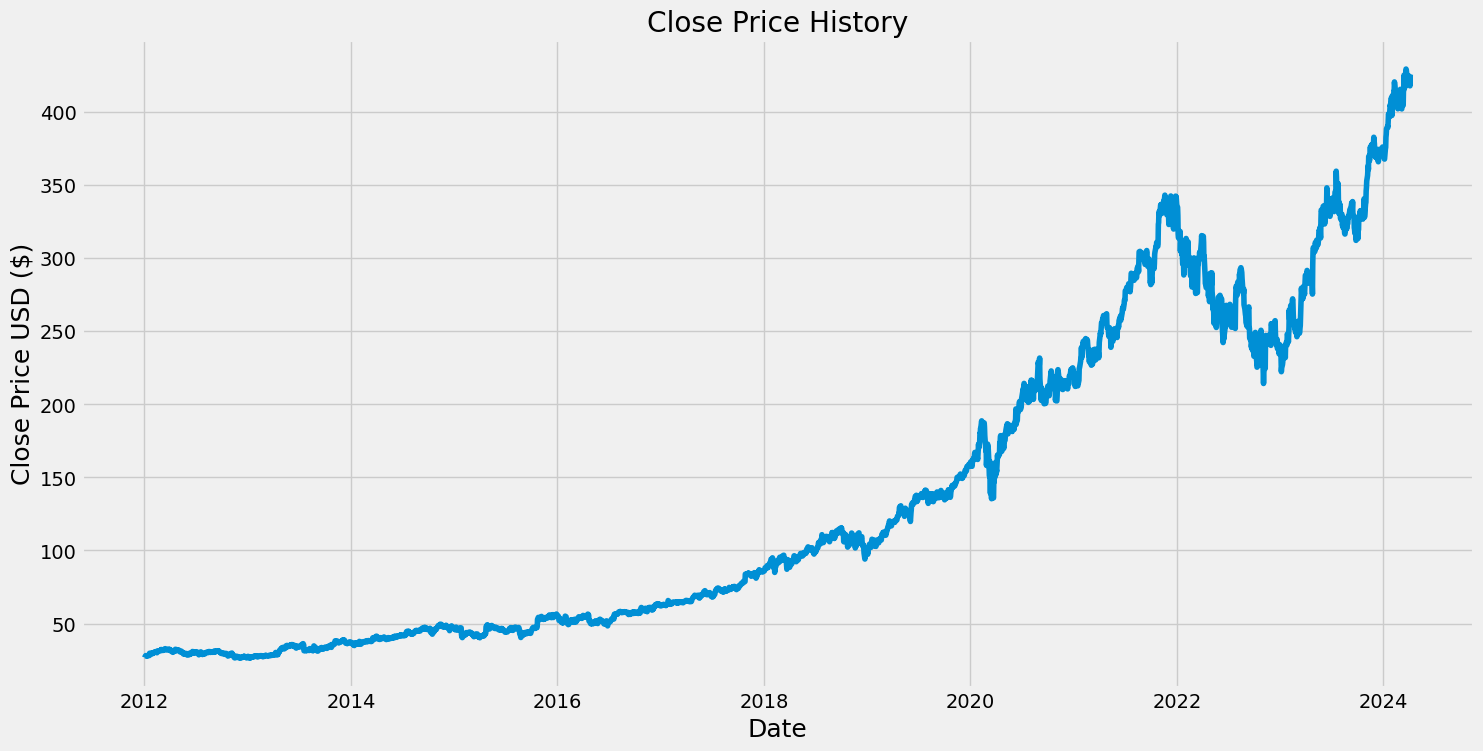

In [ ]:
#Visualize closing Price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2468

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00099255],
       [0.00255583],
       [0.00325062],
       ...,
       [0.97786605],
       [0.97148886],
       [0.99044663]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00099255, 0.00255583, 0.00325062, 0.00431762, 0.0033995 ,
       0.00364764, 0.00334987, 0.00404466, 0.00466501, 0.00468982,
       0.00461538, 0.00434243, 0.00828784, 0.00833747, 0.00736973,
       0.00791563, 0.00776675, 0.00709677, 0.0080397 , 0.00784119,
       0.00873449, 0.00888337, 0.00960298, 0.00950372, 0.00987593,
       0.01064516, 0.01091811, 0.01024814, 0.01044665, 0.00962779,
       0.00913151, 0.01220844, 0.01210918, 0.01258064, 0.01215881,
       0.01240695, 0.0126799 , 0.01235732, 0.01364764, 0.01332506,
       0.01468983, 0.01416874, 0.01347394, 0.01287841, 0.0135732 ,
       0.01399503, 0.01394541, 0.01406948, 0.01563275, 0.01588089,
       0.0160794 , 0.01545905, 0.0144665 , 0.01394541, 0.0137469 ,
       0.01397022, 0.01399503, 0.01543424, 0.01526055, 0.01444168])]
[0.014267985544152442]

[array([0.00099255, 0.00255583, 0.00325062, 0.00431762, 0.0033995 ,
       0.00364764, 0.00334987, 0.00404466, 0.00466501, 0.00468982,
       0.00461538, 0.00434243, 0.0

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2408, 60, 1)

In [ ]:
#Build ther LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2408/2408 [==============================] - 70s 28ms/step - loss: 6.1325e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled data from  index ???
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data into a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the testing data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 1s 14ms/step


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(( predictions - y_test )**2 ))
rmse

46.60447560993281

<ipython-input-20-90ee6599b10f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


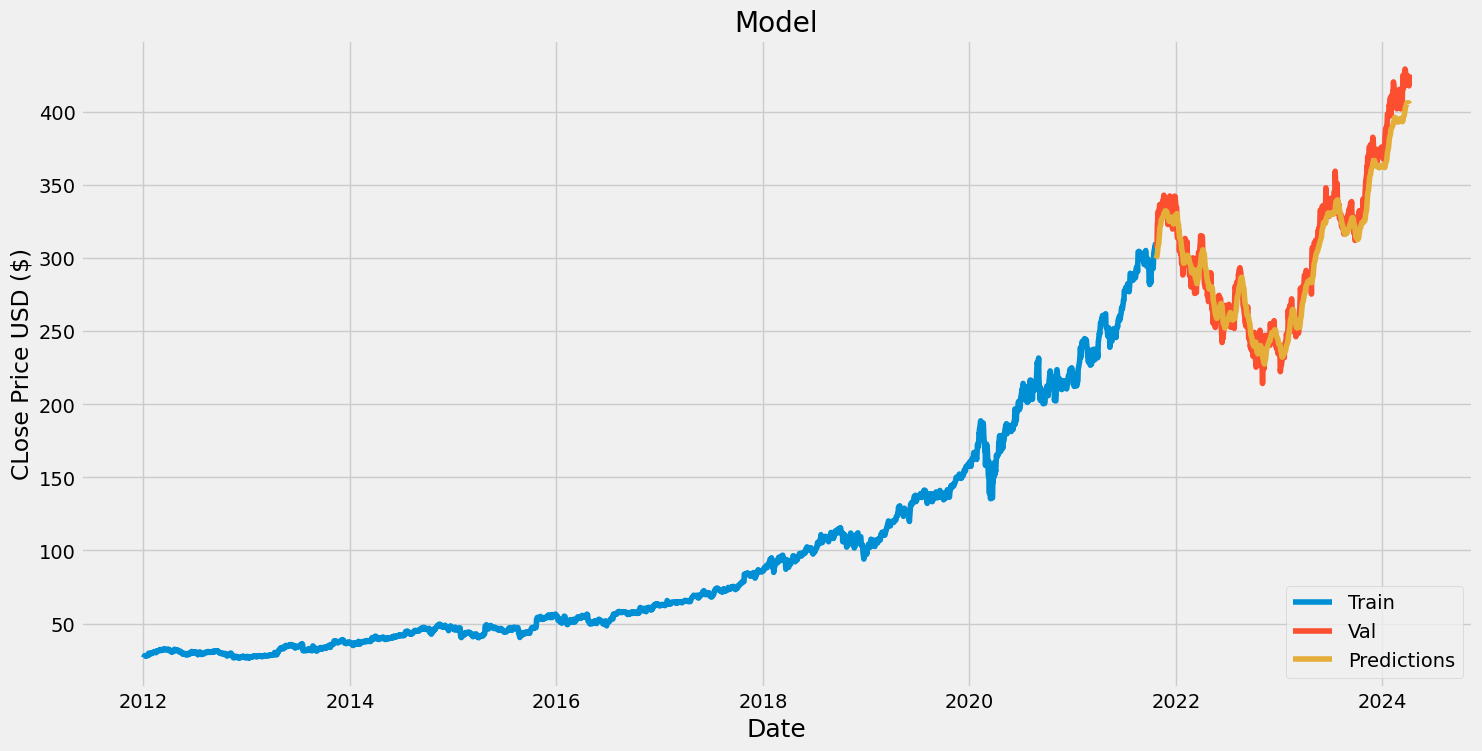

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('CLose Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-10-22,309.160004,299.735321
2021-10-25,308.130005,301.124146
2021-10-26,310.109985,302.142853
2021-10-27,323.170013,303.056488
2021-10-28,324.350006,304.989410
...,...,...
2024-04-01,424.570007,406.124359
2024-04-02,421.440002,406.257904
2024-04-03,420.450012,406.212891


In [ ]:
#Get the quote
microsoft_quote = yf.download('MSFT', start = '2012-01-01', end='2024-04-05')
#Create a new dataframe
new_df = microsoft_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframes to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create and empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 27ms/step
[[405.6]]


In [ ]:
microsoft_quote2 = yf.download('MSFT', start = '2024-04-05', end='2024-04-06')
print(microsoft_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2024-04-05    425.519989
Name: Close, dtype: float64
